<a href="https://colab.research.google.com/github/labviros/computer-vision-topics/blob/version2020/lesson02-matplotlib/3d_2d_plots_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotando em  Matplotlib

Nesse notebook, vamos ver o básico para criarmos gráficos em 2D e 3D usando a biblioteca Matplotlib.

## Criando o objeto eixos 

* Para criar gráficos bidimensionais usamos direteamente o  `matplotlib.pyplot`
* Para criar gráficos tridimensionais, precisamos importar o toolkit  `mplot3d` e usar o  `projection='3d'`, conforme será mostrado abaixo.
* O `%matplotlib` é uma "magic function", que permite que a saída dos comandos de `plot` apareçam logo abaixo da célula de código que gerou os comandos.
* Os gráficos produzidos ficarão armazenados no documento do notebook. Para mais informações, veja:  [How to make IPython notebook matplotlib plot inline ](https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline).

* Para todos gráficos de Matplotlib, começamos criando uma figura e os eixos. 

Vejamos alguns exemplos abaixo:

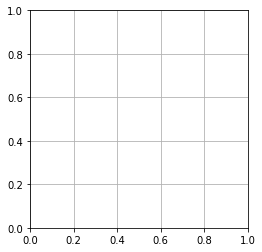

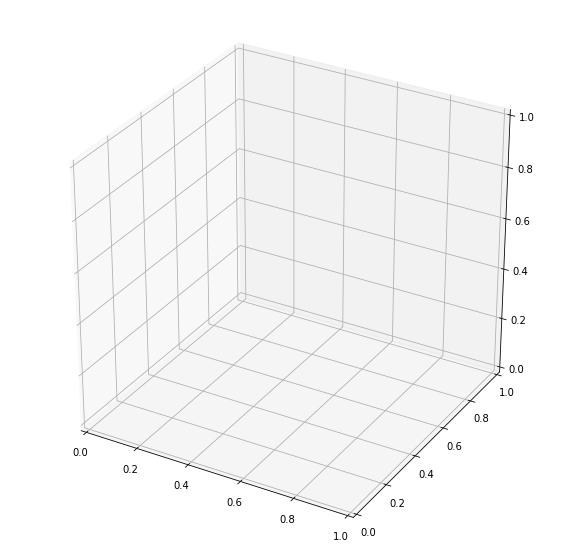

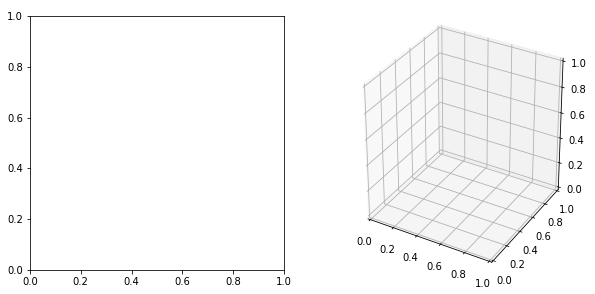

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline

# Creating a separate 2D figure
fig = plt.figure()
ax0 = plt.axes()
ax0.grid()
ax0.set_aspect('equal')

# Creating a separate 3D figure
fig = plt.figure(figsize=[10,10])
ax0 = plt.axes(projection='3d')




# Creating subfigures
fig = plt.figure(figsize=[10,5]) # We can also define a size for the figure
ax1 = fig.add_subplot(1,2,1)
ax1.set_aspect('equal')
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2, projection='3d')









Em Matplotlib, o elemento `figure` pode ser entendido como um container que guarda todos os objetos representando eixos, gráficos, texto e etiquetas/legendas.

O eixo `axes` (uma instância da classe `plt.Axes`) é o que está mostrado acima: uma *bounding box* 2D ou 3D com marcações e legendas, que conterá os elementos do gráfico que produzem sua visualização.

É dentro da área dos eixos onde os gráficos são desenhados.

## Pontos e Linhas 3D e 2D
* O gráfico 2D mais simples é uma linha ou conjunto de pontos criados a partir de coordenadas (x, y). Esses gráficos podem ser criados usando as funções `ax.plot` e `ax.scatter`.
* Os gráficos 3D são normalmente criados a partir de conjuntos de coordenadas (x, y, z). Tais gráficos podem ser criados usando as funções `ax.plot3D` e `ax.scatter3D`.
* As figuras a seguir apresentam dois tipos de gráficos: o tipo que desenho uma linha entre todos os pontos e outro que desenha apenas os pontos, sem fazer a sua conexão.
* Repare em algumas funcionalidades para ligar e desligar a grade de marcação (*grids*), mudar o aspecto do gráfico e trocar o seu ponto de visualização, no caso 3D.


In [10]:

#Complementary functions
import numpy as np
# Data for a three-dimensional line
# Array of z-coordinates
zline = np.linspace(0, 15, 1000)
# Array of x-coordinates calculated as the sine of z-values
xline = np.sin(zline)
# Array of y-coordinates calculated as the cosine of z-values
yline = np.cos(zline)

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)  # numpy.random.random returns random floats in the half-open interval [0.0, 1.0) 
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # numpy.random.randn returns a sample (or samples) from the “standard normal” distribution
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)


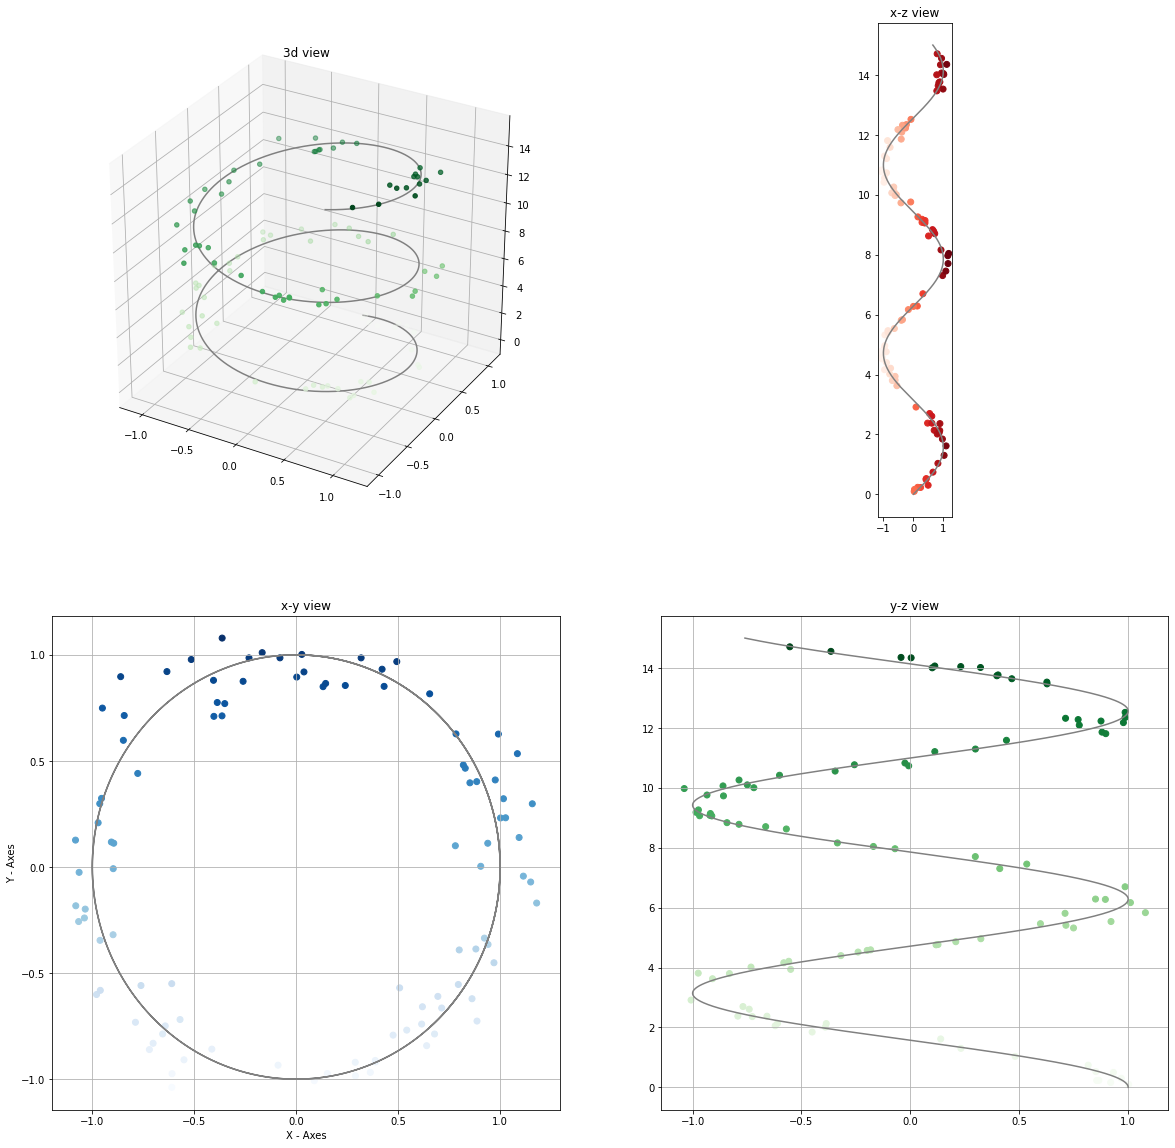

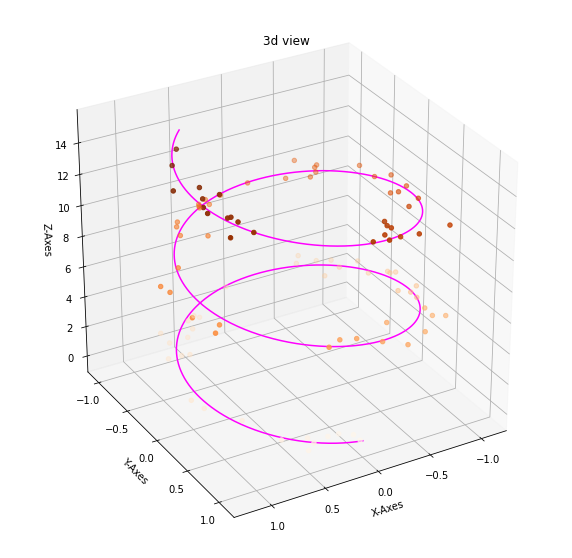

In [31]:

fig = plt.figure(figsize=(20,20))

# 3D plot
ax1 = fig.add_subplot(2,2,1,projection='3d')
ax1.set_title("3d view")
ax1.plot3D(xline, yline, zline, 'gray')
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

# 2D plot
ax2 = fig.add_subplot(2,2,2)
ax2.set_title("x-z view")
ax2.plot(xline,zline,'gray')
#ax2.plot(xdata,zdata,'r*')
ax2.scatter(xdata,zdata,c=xdata,cmap='Reds')
ax2.set_aspect('equal')

# 2D plot
ax3 = fig.add_subplot(2,2,3)
ax3.set_title("x-y view")
ax3.set_xlabel("X - Axes")
ax3.set_ylabel("Y - Axes")
ax3.plot(xline,yline,'gray')
ax3.scatter(xdata,ydata,c=ydata,cmap='Blues')
ax3.grid(True)

# 2D plot
ax4 = fig.add_subplot(2,2,4)
ax4.set_title("y-z view")
ax4.plot(yline,zline,'gray')
ax4.scatter(ydata,zdata,c=zdata,cmap='Greens')
ax4.grid()

# 3D plot
plt.figure(figsize=[10,10])
ax5 = plt.axes(projection='3d')
ax5.set_title("3d view")
ax5.plot3D(xline, yline, zline, 'magenta')
ax5.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Oranges')
ax5.view_init(elev=30,azim=60)
ax5.set_xlabel("X-Axes")
ax5.set_ylabel("Y-Axes")
ax5.set_zlabel("Z-Axes")

plt.show()


##Plotando Vetores

* Para plotar vetores usamos a função `ax.quiver`
* Essa função pode ser usada tanto com gráficos 2D e 3D

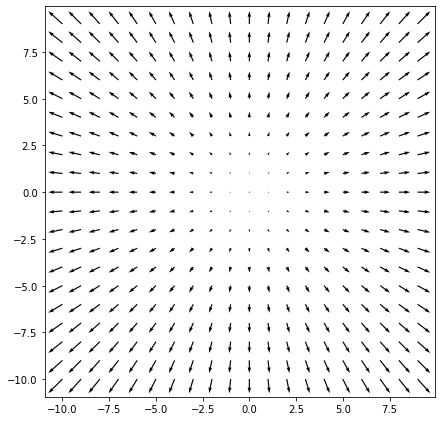

In [33]:
X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot()
q = ax.quiver(X, Y, U, V)
ax.set_aspect('equal')

plt.show()

## Usando quiver para desenhar eixos coordenados

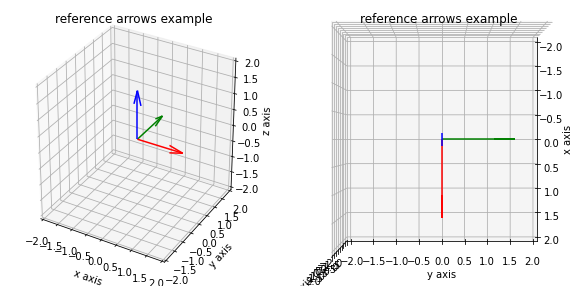

In [40]:
#defining the figure and titles

fig_quivers = plt.figure(figsize=(10,5))
quiver_ax=[]

for i in range(2):
    quiver_ax.append(fig_quivers.add_subplot(1,2,i+1,projection='3d'))
    quiver_ax[i].set_title("reference arrows example")
    quiver_ax[i].set_xlim([-2,2])
    quiver_ax[i].set_xlabel("x axis")
    quiver_ax[i].set_ylim([-2,2])
    quiver_ax[i].set_ylabel("y axis")
    quiver_ax[i].set_zlim([-2,2])
    quiver_ax[i].set_zlabel("z axis")

#base vector values
e1 = np.array([1,0,0]) # X
e2 = np.array([0,1,0]) # Y
e3 = np.array([0,0,1]) # Z

#origin point
point =np.array([0,0,0,1])

#adding quivers to the plot
for i in range(len(quiver_ax)):
    quiver_ax[i].quiver(point[0],point[1],point[2],e1,0,0,color='red',pivot='tail',  length=1.5)
    quiver_ax[i].quiver(point[0],point[1],point[2],0,e2,0,color='green',pivot='tail',  length=1.5)
    quiver_ax[i].quiver(point[0],point[1],point[2],0,0,e3,color='blue',pivot='tail',  length=1.5)

#set camera view options of a plot
quiver_ax[1].view_init(elev=90,azim=0)
quiver_ax[1].dist=7

plt.show()

